In [1]:
import tweepy as tw
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
consumer_key = 'RKGJJ75Rw8sxP0AMdsqGXMQA0'
consumer_secret = 'gZUa7x0yQgzk5LFQuglPmardDf3eNLqJYBHOwGil15e3m2EsoS'
access_token = '1583231525713334272-fr5QavDfSjSkDwUipm6P243qyMKYJG'
access_token_secret = '188K5nF6HGKHgwg7wQq2JD7tvtiBp9kDpgvp4WcRQr2UC'
#bearer_token = 'AAAAAAAAAAAAAAAAAAAAADWziQEAAAAAQAlSqp6nEQX%2Bvyj%2FBg7u2VsS%2BUU%3Dn1UQWkmJJ4Q2r2NjBinF1LGf2mo1pgFGRnrirnnSpLtvT1MVFj'

In [3]:
#Authentication
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
API = tw.API(auth,wait_on_rate_limit=True)

In [4]:
#Retrieve tweets
hashtag = ['#russia']
query = tw.Cursor(API.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweets':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

Rate limit reached. Sleeping for: 354


[{'Tweets': 'RT @Blue_Sauron: Trench warfare in Donetsk Oblast - Ukrainian servicemen of the 10th Mountain Assault Brigade, with the support of a quadco…', 'Timestamp': datetime.datetime(2022, 10, 21, 18, 54, 25, tzinfo=datetime.timezone.utc)}, {'Tweets': 'Im internationalen Luftraum über dem #BlackSea wurde eine Rakete von einem #Russia |n-Flugzeug in der Nähe eines un… https://t.co/NMIVFOPwCq', 'Timestamp': datetime.datetime(2022, 10, 21, 18, 54, 21, tzinfo=datetime.timezone.utc)}, {'Tweets': 'Un po’ di chiarezza su chi è Putin #russia #Ucraina #Putin #guerraUcraina https://t.co/WeeIrUHGFu', 'Timestamp': datetime.datetime(2022, 10, 21, 18, 54, 21, tzinfo=datetime.timezone.utc)}, {'Tweets': "POV YOU'RE IN UKRAINE: \n\n#Russia's POWERFUL response to #Ukraine's brutal TERRORIST attack on Crimean bridge is sen… https://t.co/puY8p2woE1", 'Timestamp': datetime.datetime(2022, 10, 21, 18, 54, 20, tzinfo=datetime.timezone.utc)}, {'Tweets': 'RT @5thSu: Who is #Putin, one of the best answers I 

In [10]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,RT @Blue_Sauron: Trench warfare in Donetsk Obl...,2022-10-21 18:54:25+00:00
1,Im internationalen Luftraum über dem #BlackSea...,2022-10-21 18:54:21+00:00
2,Un po’ di chiarezza su chi è Putin #russia #Uc...,2022-10-21 18:54:21+00:00
3,POV YOU'RE IN UKRAINE: \n\n#Russia's POWERFUL ...,2022-10-21 18:54:20+00:00
4,"RT @5thSu: Who is #Putin, one of the best answ...",2022-10-21 18:54:17+00:00


In [11]:
df.shape

(1000, 2)

In [19]:
russian_refs = ['VladimirPutin','Vladimir Putin','Putin','Alexander Dugin','Dugin','Special Military Operation']
ukraine_refs = ['VolodymyrZelensky','Volodymyr Zelensky','Zelensky','Crimea','Kyiv','Kiev',]
wartactic_refs = ['genocide','massacre','drone','civilian','civilians','negotiation','bomb','missile','nuclear','WW3']

In [20]:
def identify_subject(tweet, refs):
    flag = 0
    for ref in refs:
        if tweet.find(ref) !=-1:
            flag=1
    return flag
df['Russia'] = df['Tweets'].apply(lambda x: identify_subject(x, russian_refs))
df['Ukraine'] = df['Tweets'].apply(lambda x: identify_subject(x, ukraine_refs))
df['War'] = df['Tweets'].apply(lambda x: identify_subject(x, wartactic_refs))

In [21]:
df.head()

,Tweets,Timestamp,Russia,Ukraine,War
0,RT @Blue_Sauron: Trench warfare in Donetsk Obl...,2022-10-21 18:54:25+00:00,0,0,0
1,Im internationalen Luftraum über dem #BlackSea...,2022-10-21 18:54:21+00:00,0,0,0
2,Un po’ di chiarezza su chi è Putin #russia #Uc...,2022-10-21 18:54:21+00:00,1,0,0
3,POV YOU'RE IN UKRAINE: \n\n#Russia's POWERFUL ...,2022-10-21 18:54:20+00:00,0,1,0
4,"RT @5thSu: Who is #Putin, one of the best answ...",2022-10-21 18:54:17+00:00,1,0,0


In [22]:
df[df['War']==1]

,Tweets,Timestamp,Russia,Ukraine,War
12,"RT @PresseMondial: 2) cible par l'Ukraine"", el...",2022-10-21 18:54:01+00:00,0,0,1
20,RT @MrFukkew: If #Russia decides to go down th...,2022-10-21 18:53:42+00:00,0,0,1
44,"Therefore, #PUTIN must be hit hard every time ...",2022-10-21 18:52:38+00:00,0,0,1
47,"Furthermore, #Russia won't be the only country...",2022-10-21 18:52:34+00:00,0,0,1
50,If #Russia decides to go down the nuclear path...,2022-10-21 18:52:32+00:00,0,0,1
...,...,...,...,...,...
912,"RT @HooverInst: ""Sixty years after the Cuban m...",2022-10-21 18:19:47+00:00,0,0,1
930,RT @JohnBasham: BREAKING: On #Russia's TV News...,2022-10-21 18:19:21+00:00,0,0,1
944,Russia won’t attend Washington nuclear summit\...,2022-10-21 18:18:45+00:00,0,0,1
977,RT @AlexKokcharov: In the international airspa...,2022-10-21 18:17:40+00:00,0,0,1


In [24]:
#impor stopwaords
import nltk
from nltk.corpus import stopwords

#import textblob
from textblob import Word, TextBlob

In [34]:
import nltk
nltk.download('omw-1.4')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', 'Breaking']

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Colem\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [38]:
def preprocess_tweets(tweet, custom_stopwords):
    preprocessed_tweet = tweet
    preprocessed_tweet.replace('[^\w\s]', '')
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in stop_words)
    preprocessed_tweet = " ".join(word for word in preprocessed_tweet.split() if word not in custom_stopwords)
    preprocessed_tweet = " ".join(Word(word).lemmatize() for word in preprocessed_tweet.split())
    return(preprocessed_tweet)

df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Russia,Ukraine,War,Preprocessed Tweet,Processed Tweet
0,RT @Blue_Sauron: Trench warfare in Donetsk Obl...,2022-10-21 18:54:25+00:00,0,0,0,@Blue_Sauron: Trench warfare Donetsk Oblast - ...,@Blue_Sauron: Trench warfare Donetsk Oblast - ...
1,Im internationalen Luftraum über dem #BlackSea...,2022-10-21 18:54:21+00:00,0,0,0,Im internationalen Luftraum über dem #BlackSea...,Im internationalen Luftraum über dem #BlackSea...
2,Un po’ di chiarezza su chi è Putin #russia #Uc...,2022-10-21 18:54:21+00:00,1,0,0,Un po’ di chiarezza su chi è Putin #russia #Uc...,Un po’ di chiarezza su chi è Putin #russia #Uc...
3,POV YOU'RE IN UKRAINE: \n\n#Russia's POWERFUL ...,2022-10-21 18:54:20+00:00,0,1,0,POV YOU'RE IN UKRAINE: #Russia's POWERFUL resp...,POV YOU'RE IN UKRAINE: #Russia's POWERFUL resp...
4,"RT @5thSu: Who is #Putin, one of the best answ...",2022-10-21 18:54:17+00:00,1,0,0,"@5thSu: Who #Putin, one best answer I heard qu...","@5thSu: Who #Putin, one best answer I heard qu..."


In [39]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [41]:
df.head(10)

,Tweets,Timestamp,Russia,Ukraine,War,Preprocessed Tweet,Processed Tweet,polarity,subjectivity
0,RT @Blue_Sauron: Trench warfare in Donetsk Obl...,2022-10-21 18:54:25+00:00,0,0,0,@Blue_Sauron: Trench warfare Donetsk Oblast - ...,@Blue_Sauron: Trench warfare Donetsk Oblast - ...,0.000000,0.000000
1,Im internationalen Luftraum über dem #BlackSea...,2022-10-21 18:54:21+00:00,0,0,0,Im internationalen Luftraum über dem #BlackSea...,Im internationalen Luftraum über dem #BlackSea...,0.000000,0.000000
2,Un po’ di chiarezza su chi è Putin #russia #Uc...,2022-10-21 18:54:21+00:00,1,0,0,Un po’ di chiarezza su chi è Putin #russia #Uc...,Un po’ di chiarezza su chi è Putin #russia #Uc...,0.000000,0.000000
3,POV YOU'RE IN UKRAINE: \n\n#Russia's POWERFUL ...,2022-10-21 18:54:20+00:00,0,1,0,POV YOU'RE IN UKRAINE: #Russia's POWERFUL resp...,POV YOU'RE IN UKRAINE: #Russia's POWERFUL resp...,-0.287500,1.000000
4,"RT @5thSu: Who is #Putin, one of the best answ...",2022-10-21 18:54:17+00:00,1,0,0,"@5thSu: Who #Putin, one best answer I heard qu...","@5thSu: Who #Putin, one best answer I heard qu...",1.000000,0.300000
5,"RT @AlexKokcharov: In this video from #Grozny,...",2022-10-21 18:54:09+00:00,0,0,0,"@AlexKokcharov: In video #Grozny, #Chechnya, s...","@AlexKokcharov: In video #Grozny, #Chechnya, s...",0.000000,0.000000
6,Young Russians should understand that Europe w...,2022-10-21 18:54:07+00:00,0,0,0,Young Russians understand Europe want Russia g...,Young Russians understand Europe want Russia g...,0.400000,0.500000
7,RT @MFA_Ukraine: #Russia finds new ways of ter...,2022-10-21 18:54:06+00:00,0,0,0,@MFA_Ukraine: #Russia find new way terror. Rus...,@MFA_Ukraine: #Russia find new way terror. Rus...,0.136364,0.454545
8,RT @kiraincongress: We will rebuild #Ukraine n...,2022-10-21 18:54:04+00:00,0,0,0,@kiraincongress: We rebuild #Ukraine fund #Eur...,@kiraincongress: We rebuild #Ukraine fund #Eur...,0.000000,0.000000
9,RT @olex_scherba: Last night withdrawing #Russ...,2022-10-21 18:54:02+00:00,0,0,0,@olex_scherba: Last night withdrawing #Russia ...,@olex_scherba: Last night withdrawing #Russia ...,0.000000,0.066667


In [47]:
display(df[df['Russia']==1][['Russia','polarity','subjectivity']].groupby('Russia').agg([np.mean, np.max, np.min, np.median]))
df[df['Ukraine']==1][['Ukraine','polarity','subjectivity']].groupby('Ukraine').agg([np.mean, np.max, np.min, np.median])
#df[df['War']==1][['War','polarity','subjectivity']].groupby('War').agg([np.mean, np.max, np.min, np.median])

polarity                   subjectivity                 
            mean amax  amin median         mean amax amin median
Russia                                                          
1       0.413955  1.0 -0.25   0.25      0.34321  1.0  0.0    0.3

polarity                     subjectivity                 
             mean amax    amin median         mean amax amin median
Ukraine                                                            
1        0.018089  0.4 -0.2875    0.0     0.153968  1.0  0.0    0.0

In [48]:
display(df[df['War']==1][['War','polarity','subjectivity']].groupby('War').agg([np.mean, np.max, np.min, np.median]))

polarity                       subjectivity                 
         mean amax      amin median         mean amax amin median
War                                                              
1    0.084215  1.0 -0.291667    0.0     0.232837  1.0  0.0    0.0

In [49]:
#Preparing visualizations
russia = df[df['Russia']==1][['Timestamp', 'polarity']]
russia = russia.sort_values(by='Timestamp', ascending=True)
russia['MA Polarity'] = russia.polarity.rolling(10, min_periods=3).mean()

ukraine = df[df['Ukraine']==1][['Timestamp', 'polarity']]
ukraine = ukraine.sort_values(by='Timestamp', ascending=True)
ukraine['MA Polarity'] = ukraine.polarity.rolling(10, min_periods=3).mean()

war = df[df['War']==1][['Timestamp', 'polarity']]
war = war.sort_values(by='Timestamp', ascending=True)
war['MA Polarity'] = war.polarity.rolling(10, min_periods=3).mean()

In [50]:
war.head()

,Timestamp,polarity,MA Polarity
989,2022-10-21 18:17:05+00:00,1.00,NaN
977,2022-10-21 18:17:40+00:00,0.05,NaN
944,2022-10-21 18:18:45+00:00,0.00,0.3500
930,2022-10-21 18:19:21+00:00,-0.10,0.2375
912,2022-10-21 18:19:47+00:00,1.00,0.3900


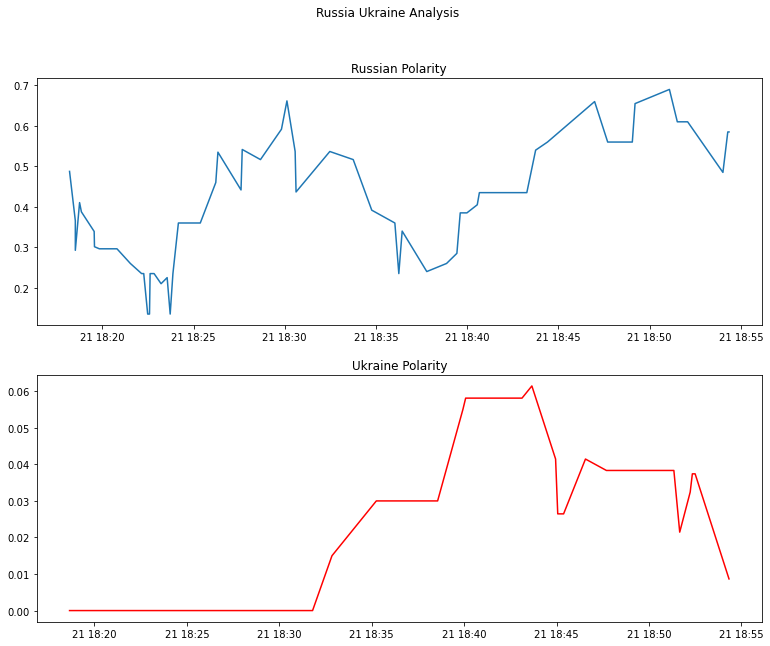

In [51]:
russ = 'red'
ukr = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(russia['Timestamp'], russia['MA Polarity'])
axes[0].set_title("\n".join(["Russian Polarity"]))
axes[1].plot(ukraine['Timestamp'], ukraine['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Ukraine Polarity"]))

fig.suptitle("\n".join(["Russia Ukraine Sentiment Analysis"]), y=0.98)

plt.show()

In [ ]:
# This is a very elementary sentiment analysis. This will serve as a starting point for more granular analysis of sentiment
# towards the various parties involved in the currently unfolding Russian-Ukrainian conflict. When complete, this analysis
# should be able to depict how the global community views both the russian military as well as the Ukrainian people in their
# struggle for conquest and liberty, respectively. Furthermore, by visualizing global sentiment towards the impending threat 
# of a third world war, hopefully the decisionmakers who caused this tragedy can come to realize that little to no one
# truly wants vistory through destruction.